In [30]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np

In [31]:
class SinuPosEncoding(nn.Module):
    def __init__(self, 
                max_freq = 10000,
                max_seq_len = 512,
                dim = 256) -> None:
        super().__init__()
        self.max_freq = max_freq
        self.max_seq_len = max_seq_len
        self.dim = dim
        self.init_pos_enc()
        self.pos_enc.requires_grad_(False)
        
    def init_pos_enc(self):
        pos_idx = torch.arange(self.max_seq_len)
        freqs = self.max_freq ** (- torch.arange(0, self.dim, 2).float() / self.dim)
        thetas = torch.einsum('l, d -> l d', pos_idx, freqs)
        self.pos_enc = torch.cat([torch.sin(thetas), torch.cos(thetas)], dim=-1)
        
    
    def forward(self, x):
        assert len(x.shape) == 4
        seq_len = x.shape[-2]
        return x + self.pos_enc[:seq_len, :]

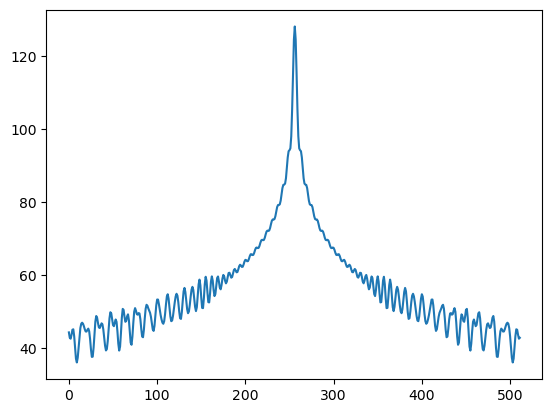

In [32]:
l = SinuPosEncoding()
mag = l.pos_enc[l.max_seq_len // 2: l.max_seq_len // 2 + 1, :] @ l.pos_enc.T
# pos decay w.r.t middle position
plt.plot(mag.squeeze())
plt.show()